<a href="https://colab.research.google.com/github/rivkms/atp_ai/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
git clone "https://github.com/rivkms/atp_ai"

In [ ]:
# 캐글과 코랩 연동을 위한 kaggle.jason 파일(캐글-My Account에서 다운로드) 업로드
!pip install kaggle
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
# kaggle.json 파일을 적절한 디렉토리로 이동
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 함 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# earthquake-magnitude-damage-and-impact 데이터셋 다운로드
!kaggle datasets download -d arashnic/earthquake-magnitude-damage-and-impact

earthquake-magnitude-damage-and-impact.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# zip파일 압축 해제 후 현재 디렉토리의 파일 리스트 보기
!unzip earthquake-magnitude-damage-and-impact.zip
!ls

Archive:  earthquake-magnitude-damage-and-impact.zip
  inflating: csv_building_damage_assessment.csv  
  inflating: csv_building_ownership_and_use.csv  
  inflating: csv_building_structure.csv  
  inflating: csv_household_demographics.csv  
  inflating: csv_household_earthquake_impact.csv  
  inflating: csv_household_resources.csv  
  inflating: csv_individual_demographics.csv  
  inflating: mapping.csv             
  inflating: ward_vdcmun_district_name_mapping.csv  
csv_building_damage_assessment.csv   csv_individual_demographics.csv
csv_building_ownership_and_use.csv   earthquake-magnitude-damage-and-impact.zip
csv_building_structure.csv	     kaggle.json
csv_household_demographics.csv	     mapping.csv
csv_household_earthquake_impact.csv  ward_vdcmun_district_name_mapping.csv
csv_household_resources.csv


NameError: name 'files' is not defined

In [ ]:
import numpy as np
import pandas as pd

# csv 파일을 pandas dataframe으로 읽기
data = pd.read_csv('./dataset/csv_building_structure.csv')

# 상위 5개 행 출력
data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
del1 = ['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'height_ft_post_eq']
del2 = ['roof_type', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag']
del3 = ['has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo']
del4 = ['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'technical_solution_proposed']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [ ]:
for n in del1:
  data.drop(n, axis=1, inplace = True)
for n in del2:
  data.drop(n, axis=1, inplace = True)
for n in del3:
  data.drop(n, axis=1, inplace = True)
for n in del4:
  data.drop(n, axis=1, inplace = True)
data.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,ground_floor_type,other_floor_type,position,damage_grade
0,9,288,9,Flat,Other,Mud,Not applicable,Not attached,Grade 3
1,15,364,9,Flat,Other,Mud,Not applicable,Not attached,Grade 5
2,20,384,9,Flat,Other,Mud,Not applicable,Not attached,Grade 2
3,20,312,9,Flat,Other,Mud,Not applicable,Not attached,Grade 2
4,30,308,9,Flat,Other,Mud,Not applicable,Not attached,Grade 1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   age_building            762106 non-null  int64 
 1   plinth_area_sq_ft       762106 non-null  int64 
 2   height_ft_pre_eq        762106 non-null  int64 
 3   land_surface_condition  762106 non-null  object
 4   foundation_type         762106 non-null  object
 5   ground_floor_type       762106 non-null  object
 6   other_floor_type        762106 non-null  object
 7   position                762105 non-null  object
 8   damage_grade            762094 non-null  object
dtypes: int64(3), object(6)
memory usage: 52.3+ MB


In [ ]:
data.isna().sum()

age_building               0
plinth_area_sq_ft          0
height_ft_pre_eq           0
land_surface_condition     0
foundation_type            0
ground_floor_type          0
other_floor_type           0
position                   1
damage_grade              12
dtype: int64

In [ ]:
data1 = data.dropna()
data1.isna().sum()

age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
land_surface_condition    0
foundation_type           0
ground_floor_type         0
other_floor_type          0
position                  0
damage_grade              0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762105
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   age_building            762094 non-null  int64 
 1   plinth_area_sq_ft       762094 non-null  int64 
 2   height_ft_pre_eq        762094 non-null  int64 
 3   land_surface_condition  762094 non-null  object
 4   foundation_type         762094 non-null  object
 5   ground_floor_type       762094 non-null  object
 6   other_floor_type        762094 non-null  object
 7   position                762094 non-null  object
 8   damage_grade            762094 non-null  object
dtypes: int64(3), object(6)
memory usage: 58.1+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar('age_building', 'damage_grade', data=data1, color='gold')
plt.title('Amount', fontsize=14)
plt.ylabel('damage_grade')
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024308F4BF78> (for post_execute):


KeyboardInterrupt: 

15     49983
20     46525
10     39794
25     37063
12     36458
       ...  
138        1
146        1
136        1
144        1
148        1
Name: age_building, Length: 176, dtype: int64

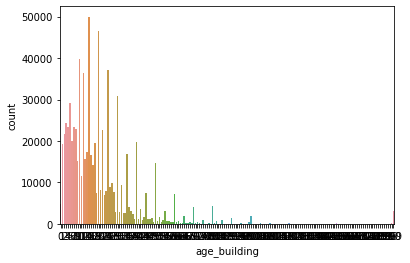

In [ ]:
sns.countplot(data=data, x='age_building')
data.loc[:,'age_building'].value_counts()

Not attached       604453
Attached-1 side    129432
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

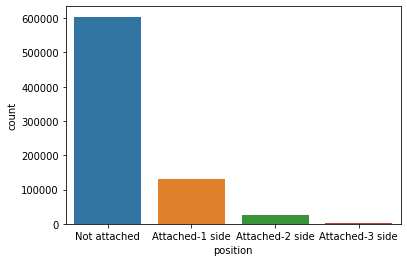

In [ ]:
sns.countplot(data=data, x='position')
data.loc[:,'position'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

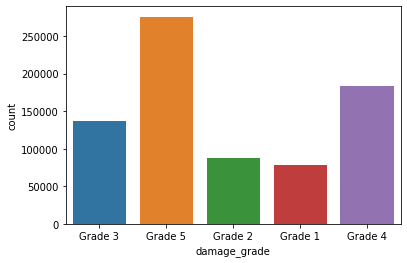

In [ ]:
sns.countplot(data=data, x='damage_grade')
data.loc[:,'damage_grade'].value_counts()

In [ ]:
data1['damage_grade']

0         Grade 3
1         Grade 5
2         Grade 2
3         Grade 2
4         Grade 1
           ...   
762101    Grade 5
762102    Grade 5
762103    Grade 5
762104    Grade 5
762105    Grade 5
Name: damage_grade, Length: 762094, dtype: object

In [ ]:
# data2=data1['damage_grade'].replace({'Grade 1':1, 'Grade 2':2,'Grade 3':3,'Grade 4':4,'Grade 5':5,}, inplace=True)
data2=data1.replace({'Grade 1':1, 'Grade 2':2,'Grade 3':3,'Grade 4':4,'Grade 5':5,}, inplace=False)
data2.head()x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,ground_floor_type,other_floor_type,position,damage_grade
0,9,288,9,Flat,Other,Mud,Not applicable,Not attached,3
1,15,364,9,Flat,Other,Mud,Not applicable,Not attached,5
2,20,384,9,Flat,Other,Mud,Not applicable,Not attached,2
3,20,312,9,Flat,Other,Mud,Not applicable,Not attached,2
4,30,308,9,Flat,Other,Mud,Not applicable,Not attached,1


In [ ]:
data2["land_surface_condition"].value_counts()

Flat              631663
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [ ]:
data2["foundation_type"].value_counts()

Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [ ]:
data2["ground_floor_type"].value_counts()

Mud            618205
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [ ]:
data2["other_floor_type"].value_counts()

TImber/Bamboo-Mud    486907
Timber-Planck        123624
Not applicable       118821
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [ ]:
data2["position"].value_counts()

Not attached       604443
Attached-1 side    129431
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

In [ ]:
data2["land_surface_condition"].describe()

count     762094
unique         3
top         Flat
freq      631663
Name: land_surface_condition, dtype: object

In [ ]:
data3 = pd.get_dummies(data2, columns=["land_surface_condition", "foundation_type", "ground_floor_type", "other_floor_type", "position"])
data3.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,damage_grade,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,...,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,position_Attached-1 side,position_Attached-2 side,position_Attached-3 side,position_Not attached
0,9,288,9,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,15,364,9,5,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,20,384,9,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,20,312,9,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,30,308,9,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
#회귀 방법 이용 인공지능

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target =data3['damage_grade']
x_feature = data3.drop(['damage_grade'],axis=1,inplace=False)

x_train, x_test, y_train, y_test= train_test_split(x_feature, y_target,test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
pred = lr_reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# MSE, RMSE, MAE 계산

def model_evaluate(y, pred):
    MSE_val = mean_squared_error(y, pred)
    RMSE_val = np.sqrt(MSE_val)
    MAE_val = mean_absolute_error(y, pred)

    print('MSE: {0:.3f}, RMSE: {1:.3F}, MAE:{2:.3F}'.format(MSE_val,RMSE_val, MAE_val))

model_evaluate(y_test,pred)

MSE: 1.311, RMSE: 1.145, MAE:0.931


In [ ]:
#딥러닝과 분류모델

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

seed = 7
np.random.seed(seed)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x = data3.iloc[:, 0:-1]
y = data3.iloc[:, 3]
print(x, y)
# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

        age_building  plinth_area_sq_ft  height_ft_pre_eq  damage_grade  \
0                  9                288                 9             3   
1                 15                364                 9             5   
2                 20                384                 9             2   
3                 20                312                 9             2   
4                 30                308                 9             1   
...              ...                ...               ...           ...   
762101            60                165                18             5   
762102            35                342                18             5   
762103            35                342                18             5   
762104            19                306                18             5   
762105            12                840                18             5   

        land_surface_condition_Flat  land_surface_condition_Moderate slope  \
0                    

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
NB_EPOCHS = 100  # num of epochs
BATCH_SIZE = 16

## 모델 정의
model = Sequential()

model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid' ))

# 모델 컴파일
model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=2) # 0 = silent, 1 = progress bar, 2 = one line per epoch.

In [ ]:
# 학습 결과 그래프 출력
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model'+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

In [ ]:
modelplot(history, 'loss', 'val_loss')

In [ ]:
modelplot(history, 'accuracy', 'val_accuracy')